In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('creditcard.csv')

In [27]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [28]:
df.shape

(284807, 31)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
df.loc[:, 'Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [51]:
df.iloc[:, -1].value_counts()

0    284315
1       492
Name: Class, dtype: int64

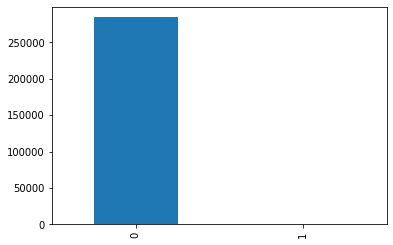

In [55]:
df.loc[:, 'Class'].value_counts().plot(kind='bar')

In [56]:
# Data Unbalance 확인.

In [58]:
# 클래스 별로 퍼센트로 표현
df.iloc[:, -1].value_counts()/df.iloc[:, -1].count()*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# New section

In [60]:
# 데이터 부분과 라벨 부분 분리.
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [66]:
# 분리된 데이터 확인
Y.shape

(284807,)

In [67]:
X.shape

(284807, 30)

In [69]:
# 트래인 데이터와 테스트 데이터 부분을 나눔.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [71]:
# 나누어진 트레인 데이터 비율 확인
print (Y_train.value_counts()/Y_train.count()*100)

0    99.826315
1     0.173685
Name: Class, dtype: float64


In [72]:
# 나누어진 테스트 데이터 비율 확인
print (Y_test.value_counts()/Y_test.count()*100)

0    99.830061
1     0.169939
Name: Class, dtype: float64


In [73]:
# 모델 생성 함수 
def modeling(mode, X_train, X_test, Y_train, Y_test):
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  metrics(Y_test, pred)

In [75]:
# 모델 평가 함수
def metrics(Y_test, pred):
  accuracy = accuracy_score(Y_test, pred)
  precision = precision_socre(Y_test, pred)
  recall = recall_score(Y_test, pred)
  f1 = f1_score(Y_test, pred)
  roc_score = roc_aux_score(Y_test, pred, average='macro')
  print ('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2: .2f}'.format(accuracy, precision, recall))
  print ('f1-score: {0:.2f}, auc: {1:.2f}'.format(f1, roc_score))